# PyTorch Computer Vision

## 0. Computer vision libraries in PyTorch

* `torchvision` - base domain library for PyTorch computer vision
* `torchvision.datasets` - get datasets & data loading functions for computer vision here
* `torchvision.models` - get pretrained computer vision models that you can leverage for your own problems
* `torchvision.transform` - functions for manipulating your vision data (images) to be suitable for use with an ML model
* `torch.utils.data.Dataset` - base dataset class for PyTorch
* `torch.utils.data.DataLoader` - creates a Python iterable over a dataset

In [184]:
# Import PyTorch 
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt


## 1. Getting a dataset

The dataset we will be using is FashionMNIST from torchvision.datasets

In [185]:
# Setup training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root="data", # Where to download data to?
    train=True, # Do we  want the training data set? If false we get the test data
    download=True, # Do we want to downlaod the data?
    transform=torchvision.transforms.ToTensor(), # How do we want to transform the data?
    target_transform=None # How do we want to transform the labels/target?
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
)

In [186]:
# See the first training example, image tensor & label int
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [187]:
# See the class names for the 9 labels
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [188]:
# See the class name and dict index
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

### 1.1 Check input & output shapes of data

In [189]:
# Check the shape of the image
print(f"Image shape: {image.shape} -> [color_channels, height, width]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: Ankle boot


### 1.2 Visualizing our data

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

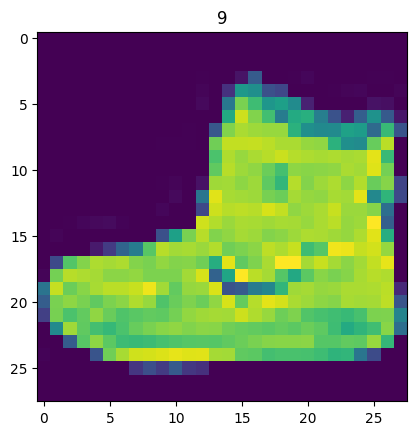

In [190]:
import matplotlib.pyplot as plt

image, label = train_data[0]

print(f"Image shape: {image.shape}")

plt.imshow(image.squeeze()) # squeeze() removes the extra dimension as matplotlib expects a 2D [height, width] array but image is 3D [color_channels, height, width ]
plt.title(label)


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

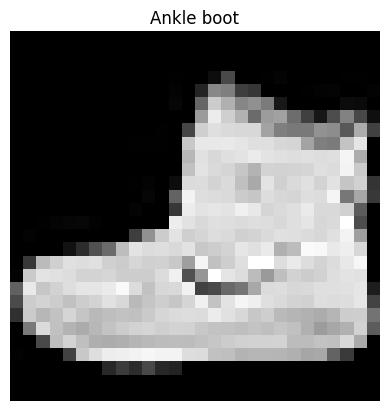

In [191]:
plt.imshow(image.squeeze(), 
           cmap='gray') # color map
plt.title(class_names[label]) # title is the label for the first image in training data
plt.axis('off') # turns off the axis

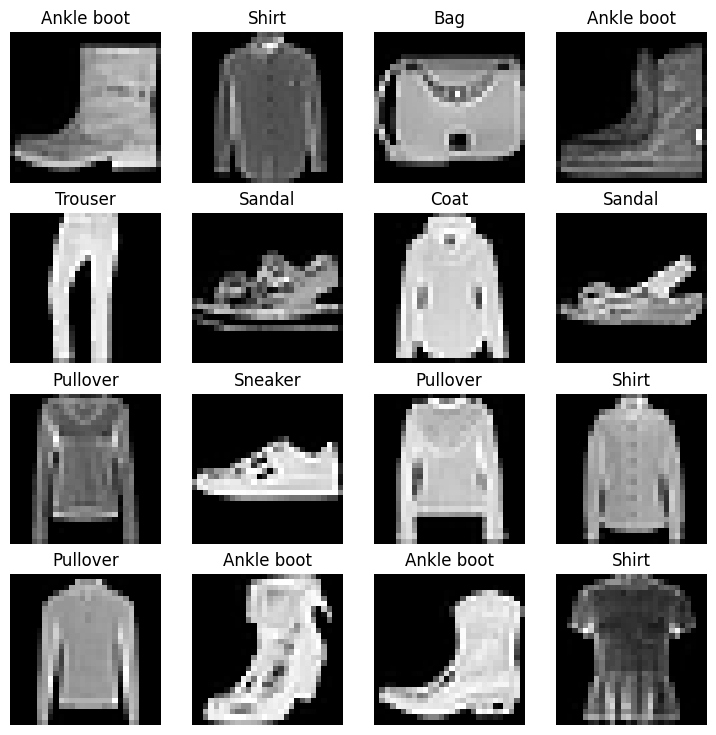

In [192]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4

for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item() # random int between 0 and 60,000, as a 1D tensor (scalar) & convert to python int
    img, label = train_data[random_idx] # get the image and label for the random index
    fig.add_subplot(rows, cols, i) # creates a 4x4 subplot 
    plt.imshow(img.squeeze(), cmap='gray') # plot the random image in greyscale
    plt.title(class_names[label]) # plot the label of the class
    plt.axis('off') # turns off the axis

Could these items (images) be modelled with pure linearity, or would we need non-linearity?

Probably nony! We need non-linearity because the data may not be graphable linearly.

## 2. Prepare DataLoader

Currently, the data is in the form of PyTorch Datasets.

Recall, a DataLoader turns a Dataset into a Python iterable.

Specifically, we want to turn our data into batches (mini-batches), similar to what is done is SGD (Stochastic Gradient Descent). We do this because:
1. It is more efficient to look at data in smaller batches then one big batch. We can load 600 images in memory, but not 60,000, so we break it into a `batch_size` of 600.
2. It gives our neural network more chances to update its gradients per epoch. Instead of 1 update per epoch for AIO (1/60,000) we get 1 update per 600 images (1/600). So instead of 1 update per epoch for loading all the data at once, we get 10 updates per epoch by loading the data in a smaller batch_size.  

In [193]:
# Import DataLoader
from torch.utils.data import DataLoader

# Setup the batch_size hyperparameter
BATCH_SIZE = 32

# Turn Datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,   # the dataset to learn from
                              batch_size=BATCH_SIZE,    # the size of each batch
                              shuffle=True)     # shuffle the data

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1f9511ad400>,
 <torch.utils.data.dataloader.DataLoader at 0x1f9586bed20>)

**NOTE:** Shuffle the training data to remove order so model does not learn order. However for evaluating the model it's generally good to have the test data in the same order as the model will never learn order, so reproducability is maintained when evaluating multiple times; the data is not shifted each time you evaluate.

In [194]:
# Lets see whats been made
print(f"DataLoaders {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} | Batches of: {BATCH_SIZE}")
print(f"Length of test_dataloader: {len(test_dataloader)} | Batches of: {BATCH_SIZE}")

DataLoaders (<torch.utils.data.dataloader.DataLoader object at 0x000001F9511AD400>, <torch.utils.data.dataloader.DataLoader object at 0x000001F9586BED20>)
Length of train_dataloader: 1875 | Batches of: 32
Length of test_dataloader: 313 | Batches of: 32


In [195]:
# See whats happening inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [196]:
# See whats happening inside the testing dataloader
test_features_batch, test_labels_batch = next(iter(test_dataloader))
test_features_batch.shape, test_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

*torch.Size([32, 1, 28, 28])*
* 32: batch_size
* 1: color_channels
* 28: height
* 28 width

*torch.Size([32])*
* 32: labels; one for eatch item in batch

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


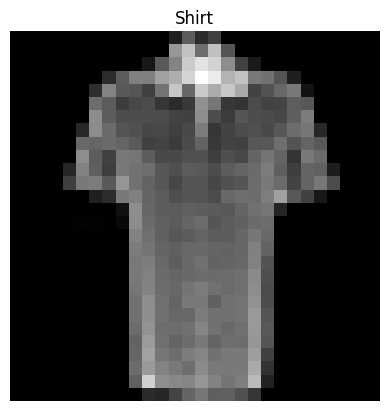

In [197]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()   # Random int between 0 and 1875, as a 1D tensor (scalar) & convert to python int
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]   # Get image & label from random index

plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)

print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Model 0: Build a baseline model

When starting to build a series of ML modelling experiments, its best practice to start with a baseline model.

A baseline model is a simple model you will try & improve upon with subsequent models/experiments

In other words: start simple & add complexity when necessary.

In [198]:
# Create a flatten layer
flatten_model= nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x)

# Print out what happened
print(f"Before flattening: {x.shape}")  # -> [color_channels, height, width]
print(f"After flattening {output.shape}") # -> [color_channels, height*width]

Before flattening: torch.Size([1, 28, 28])
After flattening torch.Size([1, 784])


In [199]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()

        self.layer_stack = nn.Sequential(
            nn.Flatten(),

            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),

            nn.Linear(in_features=hidden_units,
                      out_features=output_shape)
        )
    
    def forward(self, x):
        return self.layer_stack(x)

In [200]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape = 28*28, # height*width of image
    hidden_units = 10, 
    output_shape = len(class_names) # One for every class 
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

### 3.1 Setup loss function, optimizer, & evaluation metrics

* Loss function - since this is a multi-class dataset, we will use `nn.CrossEntropyLoss()`.
* Optimizer - stochastic gradient descent (`torch.optim.SGD`).
* Evaluation metric - since this is a classification problem, we will use accuracy as an evaluation metric.

In [201]:
import requests
from pathlib import Path

# Download helper_functions from Github
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists...")
else:
    print("Downloading helper_functions.py)")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")

    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

helper_functions.py already exists...


In [202]:
# Import accuracy from helper_functions.py
from helper_functions import accuracy_fn

# Setup loss function & optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)



### 3.2 Creating a function to time our experiments.

Machine Learning is very experimental.

Two of the main things you will often track are:
1. Models performance (loss/cost & accuracy)
2. How fast it runs.

In [203]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     stop: float,
                     device: torch.device = None):
    """Prints differnece between start & stop time.

    """
    total_time = stop - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [204]:
start_time = timer()

# some code...

end_time = timer()

print_train_time(start=start_time, 
                 stop=end_time, 
                 device="cpu")

Train time on cpu: 0.000 seconds


1.2699980288743973e-05

### 3.3 Creating a training loop & training a model on batches of data

1. Loop through epochs.
2. Loop through training batches, preform training steps, calculate the train loss *per batch*
3. Loop through testing batches, preform testing steps, calculate the test loss *per batch*
4. Print out what's happening
5. Time it all (for fun)!

In [205]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed & start the timer.
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of loops (keep small for faster training time)
epochs = 3

# Create training & test loop
for epoch in tqdm(range(epochs)): 
    print(f"Epoch: {epoch}\n-----------")

    ### Training loop
    train_loss = 0

    # Add a loop to loop through the training batches
    for batch, (X, y) in enumerate(train_dataloader): # for (FEATURES, labels). enumerate loops through the batches to keep track of how many batches have been looped through.
        model_0.train()
        
        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculate the loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # Accumulate train loss

        # 3. Optomizer zero grad
        optimizer.zero_grad()

        # 4. loss backward (back propogation)
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out whats happening
        if batch % 400 == 0:
            print(f"Looked at: {batch*len(X)}/{len(train_dataloader.dataset)} samples.") # batch*len(X) = iteration of batch * number of samples in batch. len(train_dataloader.dataset) = total number of samples in dataset

    # Divide total train loss by length of train dataloader
    train_loss /= len(train_dataloader) # train loss / number of batches (1875 batches of 32)

    ### Testing
    # Setup variables for accumulatively adding up loss and accuracy over batches
    test_loss, test_acc = 0, 0

    model_0.eval() # Sets all parameters that require gradients to false (used for inference mode)
    with torch.inference_mode():
        for X, y in test_dataloader: # for (FEATURES, labels) in 313 batches (of 32)
            # 1. Forward pass
            test_pred = model_0(X)

            # 2. Calculate the loss (accumulatively) & accuracy
            test_loss += loss_fn(test_pred, y)

            test_acc += accuracy_fn(y_true=y,
                                   y_pred=test_pred.argmax(dim=1)) # argmax() bc test pred is in logits & acc function expects labels
    
        # Calculate the test loss average per batch & accuracy
        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)

    # Print out whats happening!
    print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:4f}% ")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            stop=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----------
Looked at: 0/60000 samples.
Looked at: 12800/60000 samples.
Looked at: 25600/60000 samples.
Looked at: 38400/60000 samples.
Looked at: 51200/60000 samples.

Train loss: 0.5904 | Test loss: 0.5095 | Test acc: 82.038738% 
Epoch: 1
-----------
Looked at: 0/60000 samples.
Looked at: 12800/60000 samples.
Looked at: 25600/60000 samples.
Looked at: 38400/60000 samples.
Looked at: 51200/60000 samples.

Train loss: 0.4763 | Test loss: 0.4799 | Test acc: 83.196885% 
Epoch: 2
-----------
Looked at: 0/60000 samples.
Looked at: 12800/60000 samples.
Looked at: 25600/60000 samples.
Looked at: 38400/60000 samples.
Looked at: 51200/60000 samples.

Train loss: 0.4550 | Test loss: 0.4766 | Test acc: 83.426518% 
Train time on cpu: 13.131 seconds


## 4. Make predictions & get `model_0` results.

In [206]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader.
    
    Keyword arguments:
    argument -- description
    Return: return_description
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for (X, y) in tqdm(data_loader):
            # Make predictions
            y_pred = model(X)

            # Accumulate the loss & acc values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1)) # Gets position label of highest value logit prediction
        
        # Scale loss & acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # Only works if model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}
    
# calculate model_0 results on test dataset
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4766388535499573,
 'model_acc': 83.42651757188499}

In [207]:
y_pred.shape, y.shape

(torch.Size([32, 10]), torch.Size([16]))

## 5. Setup device agnostic code


In [208]:
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
print(f"Using device: {device}")

# 

Using device: cuda


## 6. model_1: Building a better model with non-linearity


In [209]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # flatten [1, 28, 28] matrix into [1, 784] vector

            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape),
            nn.ReLU()
        )

    def forward (self, x: torch.tensor) -> torch.tensor:
        return self.layer_stack(x)

model_1 = FashionMNISTModelV1(
    input_shape = 28*28, # height*width
    hidden_units = 10,
    output_shape = len(class_names) # how many labels in the dataset
).to(device)

model_1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [210]:
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.1 Setup loss, optimizer, & evaluation metrics

In [211]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss() # measures the loss between the predicted and true labels
optimizer = torch.optim.SGD(params=model_1.parameters(), # updates the model parameters torwards the minimum of the loss function
                            lr=0.1)

### 6.2 Functionizing training & evauluation/testing loops

Create functions for:
* Training loop - `train_loop()`
* Testing loop - `test_loop()`

In [212]:
def train_loop(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    """Preforms training with model on data_loader."""

    # Initialize the loss and accuracy
    train_loss, train_acc = 0, 0

    # Initialize training mode
    model.train()

    ### Add a loop to loop through the training batches
    for batch, (X, y) in enumerate(data_loader): # for (FEATURES, labels). enumerate loops through the batches to keep track of how many batches have been looped through.
        
        # Put data on target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate the loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # Accumulate train loss
        train_acc += accuracy_fn(y_true=y,
                                y_pred=y_pred.argmax(dim=1)) # logits -> pred labels

        # 3. Optomizer zero grad
        optimizer.zero_grad()

        # 4. loss backward (back propogation)
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Divide total train loss & accuracy by length of train dataloader
    train_loss /= len(data_loader) # train loss / number of batches (1875 batches of 32)
    train_acc /= len(data_loader)

    # Print out whats happening
    print(f"Train loss: {train_loss:.4f} | Train accuracy {train_acc:4f}%")

In [213]:
def test_loop(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
    """Preforms testing with model on data_loader."""
    
    # Initialize the test loss and accuracy
    test_loss, test_acc = 0, 0

    # Sets all parameters that require gradients to false (used for inference mode)
    model_0.eval()
    with torch.inference_mode():
        for X, y in data_loader: # for (FEATURES, labels) in 313 batches (of 32)
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate the loss (accumulatively) & accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                                    y_pred=test_pred.argmax(dim=1)) # argmax() bc test pred is in logits & acc function expects labels. logits -> pred labels
    
        # Calculate the test loss average per batch & accuracy
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)

    # Print out whats happening!
    print(f"Test loss: {test_loss:.4f} | Test acc: {test_acc:4f}% ")

In [214]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

# Set number of loops
epochs = 3

# Create an optimization &  evaluation loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-----------------------")

    train_loop(model=model_1,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn)
    
    test_loop(model=model_1,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            stop=train_time_end_on_gpu,
                                            device=str(next(model_1.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----------------------
Train loss: 1.1146 | Train accuracy 58.463333%
Test loss: 0.9632 | Test acc: 63.408546% 
Epoch: 1
-----------------------
Train loss: 0.9091 | Train accuracy 64.866667%
Test loss: 0.7454 | Test acc: 72.613818% 
Epoch: 2
-----------------------
Train loss: 0.5951 | Train accuracy 78.256667%
Test loss: 0.4953 | Test acc: 82.677716% 
Train time on cuda:0: 17.162 seconds


In [215]:
# Train time on CPU
total_train_time_model_0

13.130726000003051

In [216]:
# Train time on GPU
total_train_time_model_1

17.16222930001095

**Note:** Sometimes, depending on your data/hardware models might train faster on CPU than GPU. This is because:
1. The overhead for copying data/model from CPU to & from the GPU outweighs the compute benefits offered by the GPU.
2. You have a faster CPU than GPU.

For more on how to make your models compute faster, see here: https://horace.io/brrr_intro.html

In [217]:
# Get model_1 results dictionary

model_1_results = eval_model(model=model_1.to("cpu"),
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.49533671140670776,
 'model_acc': 82.67771565495208}

In [218]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
    """Returns a dictionary containing the results of model predicting on data_loader.
    
    Keyword arguments:
    argument -- description
    Return: return_description
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for (X, y) in tqdm(data_loader):
            # send data to target device
            X, y = X.to(device), y.to(device)
            
            # Make predictions
            y_pred = model(X)

            # Accumulate the loss & acc values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1)) # Gets position label of highest value logit prediction
        
        # Scale loss & acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # Only works if model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

## Model_2: Building a Convolutional Nerual Network (CNN)

CNN's, also known as ConvNets, are known for their capabilities to find patters in visual data.

In [219]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
    """Model architecture that replicates the TinyVGG model"""
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        # Convolutional layers
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        ### Output of above blocks will be multi-dimensional tensor so we want to flatten it to 1D
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=(hidden_units*50)-10,
                      out_features=output_shape) # output_shape is the number of classes
        )

    def forward (self, x):
        x = self.conv_block_1(x)
        #print(f"Output shape of conv_block_1: {x.shape}")
        x = self.conv_block_2(x)
        #print(f"Output shape of conv_block_2: {x.shape}")
        x = self.classifier(x)
        return x


In [220]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, # number of color channels (we use black & white so 1, for a colored image it is 3 (R.G.B))
                             hidden_units=10,
                             output_shape=len(class_names)).to(device)

In [221]:
image.shape

torch.Size([1, 28, 28])

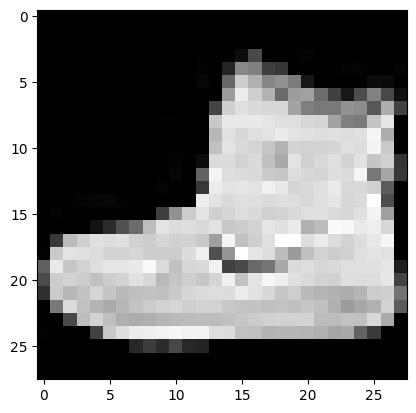

In [222]:
plt.imshow(image.squeeze(), cmap='gray')

In [223]:
# pass image through the model
#model_2(image.to(device))

### 7.1 Stepping through `nn.Conv2d()`

In [224]:
torch.manual_seed(42)

# Create a batch of images
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(f"Image batch shape: {images.shape} | Single image shape {test_image.shape}\nTest image:\n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64]) | Single image shape torch.Size([3, 64, 64])
Test image:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [225]:
test_image.shape

torch.Size([3, 64, 64])

In [226]:
torch.manual_seed(42)
# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3, # color channels
                       out_channels=10, # how many hidden units
                       kernel_size=3, # is a tuple, 3=(3,3); 5=(5,5)
                       stride=1, # how many pixels to skip in the image during convolution 
                       padding=1) # how many pixels to pad the image during convolution (helps with edge detection)

# Pass the data through the conv2d layer
conv_output = conv_layer(images)
conv_output.shape

torch.Size([32, 10, 64, 64])

Passing the data through conv_layer increased the `out_channels` to 10 & decreased the image size by 2pix

### 7.2 Stepping through `nn.MaxPool2d()`

In [227]:
# Print out original image shape.
print(f"Original test_image shape: {test_image.shape}")

# Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just conv_layer
test_image_through_conv = conv_layer(test_image)
print(f"Shape after conv_layer: {test_image_through_conv.shape}")

# Pass data through max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer & max pool layer: {test_image_through_conv_and_max_pool.shape}")


Original test_image shape: torch.Size([3, 64, 64])
Shape after conv_layer: torch.Size([10, 64, 64])
Shape after going through conv_layer & max pool layer: torch.Size([10, 32, 32])


max_pool takes the highest value from the kernel, essentially keeping whats most "important" & discarding the rest compressing the image in the process.

In [228]:
torch.manual_seed(42)

# create a random tensor with a similar shape to the test image
random_image = torch.randn(1, 1, 2, 2)
print(f"Random image and shape:\n{random_image} | {random_image.shape}")

# pass random image through max pool layer
random_image_through_max_pool = max_pool_layer(random_image)
print(f"\nAfter going through max pool layer:\n{random_image_through_max_pool} | {random_image_through_max_pool.shape}")

Random image and shape:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]]) | torch.Size([1, 1, 2, 2])

After going through max pool layer:
tensor([[[[0.3367]]]]) | torch.Size([1, 1, 1, 1])


### 7.3 Setup a loss function & optimizer for `model_2`

In [229]:
# setup loss function/eval metrics/optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

In [230]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

### Training & testing `model_2` using training & testing functions

In [231]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as Timer
train_time_start_model_2 = timer()

# train & test model
epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"\nEpoch: {epoch}\n----------------------------")

    train_loop(
        model=model_2,
        data_loader=train_dataloader,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )

    test_loop(
        model=model_2,
        data_loader=test_dataloader,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(
    start=train_time_start_model_2,
    stop=train_time_end_model_2,
    device=device
)

  0%|          | 0/3 [00:00<?, ?it/s]


Epoch: 0
----------------------------
Train loss: 0.5917 | Train accuracy 78.525000%
Test loss: 0.3878 | Test acc: 86.062300% 

Epoch: 1
----------------------------
Train loss: 0.3619 | Train accuracy 86.966667%
Test loss: 0.3551 | Test acc: 87.170527% 

Epoch: 2
----------------------------
Train loss: 0.3267 | Train accuracy 88.183333%
Test loss: 0.3192 | Test acc: 88.328674% 
Train time on cuda: 20.995 seconds


In [232]:
# get model_2 results
model_2_results = eval_model(model=model_2,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.31923434138298035,
 'model_acc': 88.32867412140575}

In [233]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4766388535499573,
 'model_acc': 83.42651757188499}

## 8. Compare model results & training time

In [234]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.495337,82.677716
2,FashionMNISTModelV2,0.319234,88.328674


In [235]:
# Add training time to results comparison
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,13.130726
1,FashionMNISTModelV1,0.495337,82.677716,17.162229
2,FashionMNISTModelV2,0.319234,88.328674,20.994854


0. **FashionMNISTModelV0:** Base-line. Trained with 2 linear functions on CPU.
1. **FashionMNISTModelV1:** Trained with 2 non-linear functions on GPU.
2. **FashionMNISTModelV2:** Trained in a convolutional nerual networm (C.N.N) on GPU.

Text(0, 0.5, 'model')

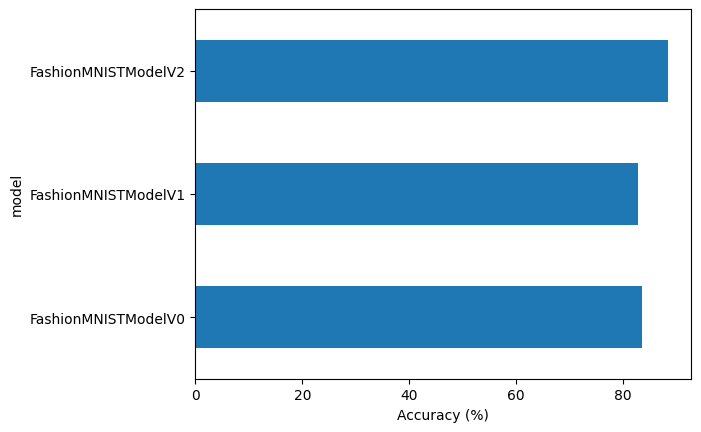

In [236]:
# Visualize model results
compare_results.set_index("model_name") ["model_acc"].plot(kind="barh")
plt.xlabel("Accuracy (%)")
plt.ylabel("model")

## 9. Make & evaluate random predictions with best model


In [237]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # prepare the sample
            sample = torch.unsqueeze(sample, dim=0).to(device)

            # Forward pass (model outputs raw logits)
            pred_logit = model(sample)

            # Get pred prob from logit (logit -> pred prob)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())

    # Stack pred_probs to turn lest into a tensor
    return torch.stack(pred_probs)


In [240]:
import random
random.seed(42)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

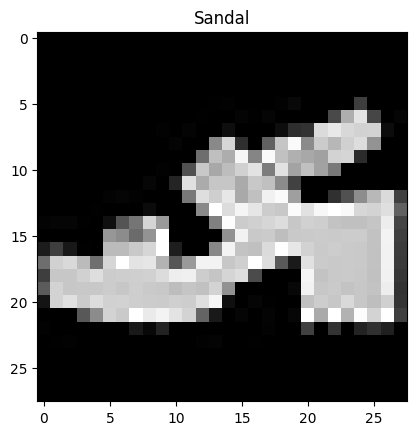

In [245]:
plt.imshow(test_samples[0].squeeze(), cmap='gray')
plt.title(class_names[test_labels[0]])

In [247]:
# Make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

# View the first 2 prediction probabilities
pred_probs[:2]

tensor([[6.6259e-08, 5.0139e-09, 9.6827e-09, 7.1434e-09, 2.5687e-09, 9.9985e-01,
         4.9642e-08, 1.8244e-06, 2.6436e-06, 1.4455e-04],
        [5.9071e-02, 6.8626e-01, 3.8142e-05, 5.5450e-02, 9.5900e-02, 3.6003e-05,
         1.0310e-01, 8.1584e-05, 4.1660e-05, 2.3529e-05]])

In [255]:
# Convert pred probs to labels
pred_labels = torch.argmax(pred_probs, dim=1)
pred_labels

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])